In [2]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [3]:
class Video:
    def __init__(self, uid): 
        self.uid = uid
        if uid not in video_db:
            self.title, self.tags, self.description, self.category, self.channel_title = None, None, None, None, None
            self.title_emb, self.tags_emb, self.description_emb = empty_title, [], empty_desc
            return

        vs = video_db[uid]['snippet']
        self.title = vs['title']
        self.tags = vs.get('tags', [])
        self.description = vs['description']
        self.category = vs['categoryId']
        self.channel_title = vs['channelTitle']
        
        self.title_emb = video_db[uid]['embeddings']['title']
        self.tags_emb = video_db[uid]['embeddings']['tags']
        self.description_emb = video_db[uid]['embeddings']['description']

    def __repr__(self):
        if self.title is None:
            return 'Video not found'
        return self.title
    
    def __str__(self):
        if self.title is None:
            return 'Video not found'
        return self.title
    
    def __hash__(self):
        return hash(self.uid)

video_session = pd.read_pickle('video_sessions.pkl')

In [4]:
category_names = {0: 'Missing', 1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers' }

In [5]:
categories = []
for session in video_session:
    cat = session['video'].category
    if cat is None:
        categories.append('Missing')
    else:
        cat = int(cat)
        categories.append(category_names.get(cat, 'Other'))

In [14]:
tags = []
for session in video_session:
    tags.append(session['video'].tags)

all_tags = []
for t in tags:
    if t is not None:
        all_tags.extend([i.lower() for i in t])

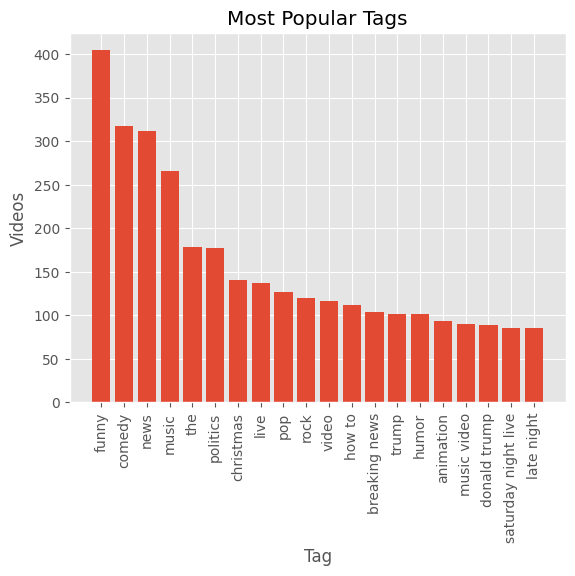

In [19]:
# make bar chart of most popular tags
from collections import Counter
tag_counts = Counter(all_tags)
tag_counts.most_common(20)

# plot bar
# use theme
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.bar(*zip(*tag_counts.most_common(20)))
plt.xticks(rotation=90)
plt.xlabel('Tag')
plt.ylabel('Videos')
plt.title('Most Popular Tags')
plt.show()


